In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
stock = yf.Ticker("TCS.NS")

In [ ]:
data = yf.download("TCS.NS", start='1996-01-01', end='2024-08-13',interval='1d',actions=False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.count()

,0
Open,5461
High,5461
Low,5461
Close,5461
Adj Close,5461
Volume,5461


In [ ]:
df = data['Close']

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,Close
0,39.700001
1,39.162498
2,36.462502
3,36.462502
4,36.375000


In [ ]:
mm = MinMaxScaler(feature_range=(0, 1))
df = mm.fit_transform(df)

In [ ]:
type(df)

numpy.ndarray

In [ ]:
 #Here we are finding length of training dataset and testing dataset

 len_train = int(len(df)*0.8)
 len_test = len(df) - len_train

In [ ]:
x_train = df[:len_train]
x_test = df[len_train:]

In [ ]:
xnew_train =[]
ynew_train=[]

for i in range(60,len(x_train)):
    z=[]
    for j in range(i-60,i):
        z.append(x_train[j])
    xnew_train.append(z)
    ynew_train.append(x_train[i])

In [ ]:
xnew_test =[]
ynew_test=[]
for i in range(60,len(x_test)):
    z=[]
    for j in range(i-60,i):
        z.append(x_test[j])
    xnew_test.append(z)
    ynew_test.append(x_test[i])

In [ ]:
print(xnew_test[0])

[[0.39764421]
 [0.40600121]
 [0.38080417]
 [0.37200011]
 [0.37117473]
 [0.36703635]
 [0.40397212]
 [0.37468258]
 [0.38235176]
 [0.39316195]
 [0.40248185]
 [0.41017395]
 [0.39962742]
 [0.41054078]
 [0.38363568]
 [0.37112886]
 [0.39887081]
 [0.38287907]
 [0.39679592]
 [0.39521393]
 [0.38968847]
 [0.38530938]
 [0.40597826]
 [0.40883271]
 [0.39026165]
 [0.39756397]
 [0.42249734]
 [0.40880979]
 [0.41294814]
 [0.41809532]
 [0.42877941]
 [0.45372422]
 [0.43446534]
 [0.43499268]
 [0.42830939]
 [0.42556959]
 [0.42597082]
 [0.43557734]
 [0.43883299]
 [0.43886739]
 [0.4280228 ]
 [0.42585619]
 [0.43793883]
 [0.43863812]
 [0.43977301]
 [0.44839364]
 [0.45507693]
 [0.43734272]
 [0.4516264 ]
 [0.45139713]
 [0.44407186]
 [0.46078582]
 [0.46122144]
 [0.46099217]
 [0.47140114]
 [0.46147364]
 [0.46686154]
 [0.46693033]
 [0.47534461]
 [0.4659215 ]]


In [ ]:
xnew_train = np.array(xnew_train)
ynew_train = np.array(ynew_train)
xnew_test = np.array(xnew_test)

In [ ]:
xnew_train.shape

(4308, 60, 1)

In [ ]:
xnew_train[0].shape

(60, 1)

In [ ]:
ynew_train.shape

(4308, 1)

In [ ]:
xnew_test.shape

(1033, 60, 1)

In [ ]:
ynew_test = np.array(ynew_test)

In [ ]:
ynew_test.shape


(1033, 1)

In [ ]:
model = Sequential()

model.add(LSTM(60, return_sequences =True, input_shape=(xnew_train.shape[1],1)))
# model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences =True))
# model.add(Dropout(0.2))
model.add(SimpleRNN(80))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(xnew_train,ynew_train,epochs=5)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - loss: 0.0079
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - loss: 2.3711e-04
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - loss: 1.2467e-04
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - loss: 9.7130e-05
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - loss: 7.6379e-05


In [ ]:
pred = model.predict([xnew_test])

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


In [ ]:
pred = np.array(pred)
ynew_test = np.array(ynew_test)

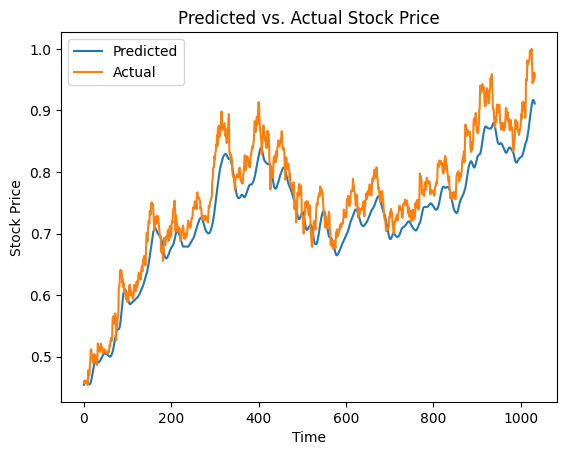

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pred.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(ynew_test.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()

In [ ]:
m = mm.inverse_transform(pred)
n = mm.inverse_transform(ynew_test)

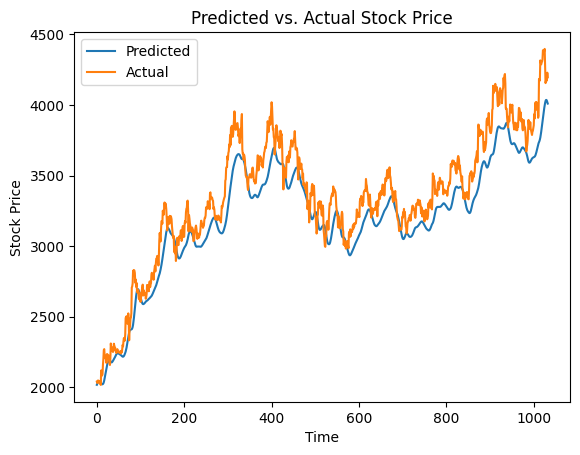

In [ ]:
plt.plot(m.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(n.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()

In [ ]:
data = yf.download("TCS.NS", start='2020-01-01', end='2024-10-15',interval='1d',actions=False)


[*********************100%***********************]  1 of 1 completed


In [ ]:
df = data['Close']

In [ ]:
df = df.reset_index()

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.head()

,Close
0,2167.600098
1,2157.649902
2,2200.649902
3,2200.449951
4,2205.850098


In [ ]:
mm = MinMaxScaler(feature_range=(0, 1))
df = mm.fit_transform(df)

In [ ]:
xnew_test =[]
ynew_test=[]
for i in range(60,len(df)):
    z=[]
    for j in range(i-60,i):
        z.append(df[j])
    xnew_test.append(z)
    ynew_test.append(df[i])

In [ ]:
xnew_test = np.array(xnew_test)
ynew_test = np.array(ynew_test)


In [ ]:
pred = model.predict(xnew_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [ ]:
pred = np.array(pred)
ynew_test = np.array(ynew_test)

In [ ]:
m = mm.inverse_transform(pred)
n = mm.inverse_transform(ynew_test)

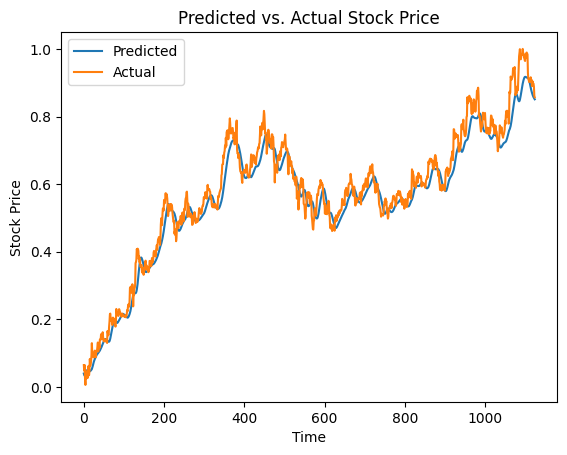

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pred.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(ynew_test.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()

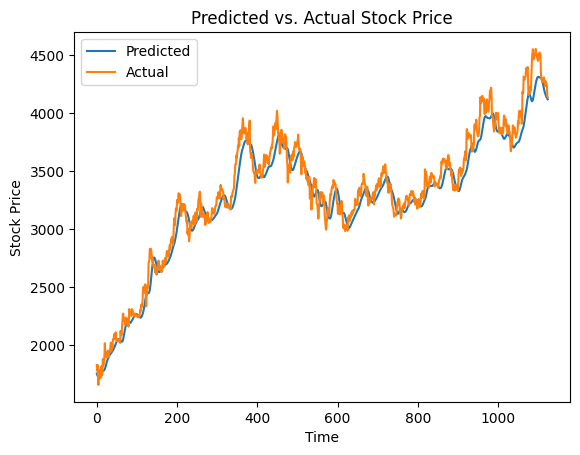

In [ ]:
plt.plot(m.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(n.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()